# Dataset e Input


## 1) Random semplici

In [46]:
import torch
import matplotlib.pyplot as plt

In [47]:
N=10
input_size=100
output_size=1

X=torch.rand(N,input_size)
Y=torch.rand(N,output_size)

Questi dati possono essere utilizzati a livello tensoriale ma non sono pronti per essere usati tramite un modello in classe.

# Dataset class

The dataset class summarizes the basic functionality of a dataset in a natural way. To define a dataset in PyTorch, we simply specify two functions: __getitem__, and __len__. The get-item function has to return the -th data point in the dataset, while the len function returns the size of the dataset. For the XOR dataset, we can define the dataset class as follows:

In [48]:
import torch.utils.data as data

In [49]:
class MyDataset(data.Dataset):
    def __init__(self,n,std=0.01):
        super().__init__()
        self.std=std
        self.n=n
        self.generate_continuous_xor()
    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.n

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label
    
    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        data = torch.randint(low=0, high=2, size=(self.n, 2), dtype=torch.float32)
        
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)
        
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        label = (data.sum(dim=1) == 1).to(torch.long)

        self.data = data
        self.label = label

        

In [50]:
dataset = MyDataset(n=200,std=0.1)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([0.9715, 0.9337]), tensor(0))


In [51]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(8,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

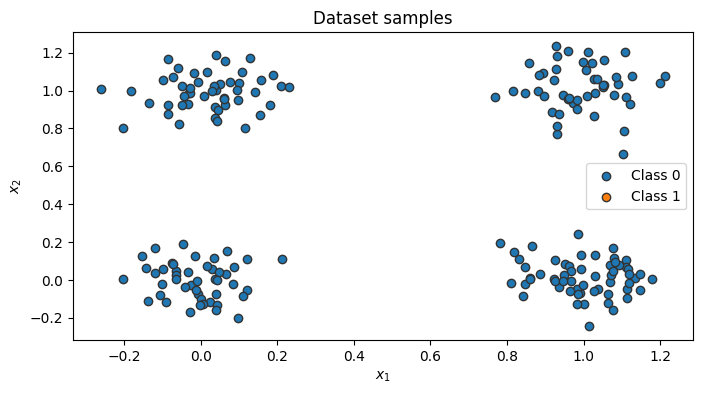

In [52]:
visualize_samples(dataset.data, dataset.label)
plt.show()

# The dataloader class

The class torch.utils.data.DataLoader represents a Python iterable over a dataset with support for automatic batching, multi-process data loading and many more features. The data loader communicates with the dataset using the function __getitem__, and stacks its outputs as tensors over the first dimension to form a batch.

batch_size: Number of samples to stack per batch

shuffle: If True, the data is returned in a random order. This is important during training for introducing stochasticity.

num_workers: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images). More workers are recommended for those, but can cause issues on Windows computers. For tiny datasets as ours, 0 workers are usually faster.

pin_memory: If True, the data loader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs. Usually a good practice to use for a training set, but not necessarily for validation and test to save memory on the GPU.

drop_last: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.

In [53]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [54]:
# next(iter(...)) catches the first batch of the data loader
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.0642,  0.0280],
        [-0.0064, -0.0740],
        [ 0.0644,  0.9260],
        [ 0.9853, -0.0757],
        [ 0.7681,  0.9668],
        [-0.0571,  0.8221],
        [ 1.0790,  0.9760],
        [ 0.9457, -0.0048]])
Data labels torch.Size([8]) 
 tensor([0, 0, 0, 0, 0, 0, 0, 0])
